# Supervised Learning and K Nearest Neighbors Exercises

## Introduction

We will be using customer churn data from the telecom industry for the first week's exercises. The data file is called 
`Orange_Telecom_Churn_Data.csv`. We will load this data together, do some preprocessing, and use K-nearest neighbors to predict customer churn based on account characteristics.

In [29]:
from __future__ import print_function
import os
data_path = ['..', '..', 'data']

## Question 1

* Begin by importing the data. Examine the columns and data.
* Notice that the data contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not? 

We will not be using them, so they can be dropped from the data.

In [30]:
import pandas as pd

#import data using file path
filepath = "C:\\Users\\mulyana\\Desktop\\mulyana\\data\\Orange_Telecom_Churn_Data.csv"


#read data
data = pd.read_csv(filepath)

In [31]:
#how to display
#data.head() - default 5 data
#data.head(1) - first top data
#data.head(1).T - in different format
data.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [32]:
#removing particular column
data.drop(['state','area_code','phone_number'],axis=1,inplace=True)

In [33]:
#check out no longer unused columns.
data.head(1).T

,0
account_length,128
intl_plan,no
voice_mail_plan,yes
number_vmail_messages,25
total_day_minutes,265.1
total_day_calls,110
total_day_charge,45.07
total_eve_minutes,197.4
total_eve_calls,99
total_eve_charge,16.78


In [34]:
data.columns

Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

## Question 2

* Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded using one of the methods from the lecture.
* Finally, remember from the lecture that K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture.

In [35]:
#identify data type
data.dtypes

account_length                     int64
intl_plan                         object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                             bool
dtype: object

In [36]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

#using loop to identify data
for col in ['intl_plan', 'voice_mail_plan','churned']:
    data[col]=lb.fit_transform(data[col])

In [37]:
data.dtypes

account_length                     int64
intl_plan                          int32
voice_mail_plan                    int32
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                            int32
dtype: object

In [38]:
#add scale
#mute the sklearn warning
import warnings
warnings.filterwarnings('ignore',module='sklearn')

from sklearn.preprocessing import MinMaxScaler

msc=MinMaxScaler()
data = pd.DataFrame(msc.fit_transform(data),columns=data.columns)

In [39]:
data.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111,0.0
1,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111,0.0
2,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000,0.0
3,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222,0.0
4,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333,0.0


## Question 3

* Separate the feature columns (everything except `churned`) from the label (`churned`). This will create two tables.
* Fit a K-nearest neighbors model with a value of `k=3` to this data and predict the outcome on the same data.

In [40]:
#separating column, into two tables
#for all column except churned(the classifier),
x_cols=[x for x in data.columns if x!='churned']
#split the data
X_data = data[x_cols]
y_data = data['churned']

from sklearn.neighbors import KNeighborsClassifier
#set k=3
knn = KNeighborsClassifier(n_neighbors=3)
#fitting the data
knn = knn.fit(X_data,y_data)
#prediction
y_pred=knn.predict(X_data)

## Question 4

Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false). 

* Write a function to calculate accuracy using the actual and predicted labels.
* Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

In [41]:
#calculate accuracy
def accuracy(real,predict):
    return sum(y_data == y_pred)/float (real.shape[0])

In [42]:
print(accuracy(y_data,y_pred))

0.9422


## Question 5

* Fit the K-nearest neighbors model again with `n_neighbors=3` but this time use distance for the weights. Calculate the accuracy using the function you created above. 
* Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

When weighted distances are used for part 1 of this question, a value of 1.0 should be returned for the accuracy. Why do you think this is? *Hint:* we are predicting on the data and with KNN the model *is* the data. We will learn how to avoid this pitfall in the next lecture.

In [43]:
#set k=3, distance weight
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
#fitting the data
knn = knn.fit(X_data,y_data)
#prediction
y_pred=knn.predict(X_data)

print (accuracy(y_data,y_pred))

1.0


In [44]:
#set k=3, power parameter =1
knn = KNeighborsClassifier(n_neighbors=3, p=1)
#fitting the data
knn = knn.fit(X_data,y_data)
#prediction
y_pred=knn.predict(X_data)

print (accuracy(y_data,y_pred))

0.9456


## Question 6

* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`? Why do you think this is? *Hint:* it's for the same reason discussed above.

In [47]:
#find value of nearest neighbors

#create variable score_list
score_list = list()
for k in range(1,21):
    #set k=3, distance weight
    knn = KNeighborsClassifier(n_neighbors=k)
    #fitting the data
    knn = knn.fit(X_data,y_data)
    #prediction
    y_pred=knn.predict(X_data)
    score = accuracy(y_data,y_pred)
    
    score_list.append((k,score))
score_df = pd.DataFrame(score_list, columns = ['k','accuracy'])


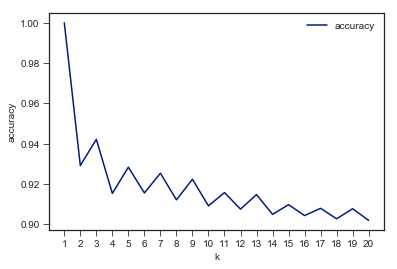

In [48]:
#plotting graph
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlib inline
sns.set_style('ticks')
sns.set_palette('dark')

ax=score_df.set_index('k').plot()
ax.set(xlabel='k',ylabel='accuracy')
ax.set_xticks(range(1,21));

In [5]:
nbinte


ModuleNotFoundError: No module named 'anvil'